# IBM Developer Skills Network

# Stochastic Gradient Descent (SGD) for Linear Regression

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [2]:
# Class for plot diagram
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

# Make some Data

In [3]:
# Set random seed (to force random engine to give out same value each time)
torch.manual_seed(1)

In [4]:
# Setup the data with error
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1*X - 1
Y = f + 0.1*torch.randn(X.size())

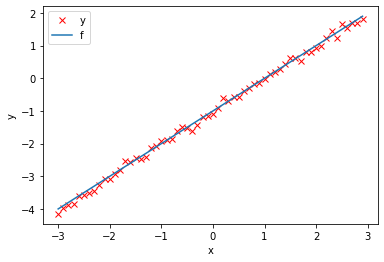

In [5]:
# Plot the result
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the Model and Cost Function (Total Loss)

In [6]:
# Define the forward function
def forward(x):
    return w*x + b

In [7]:
# Define the MSE loss function
def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

<Figure size 432x288 with 0 Axes>

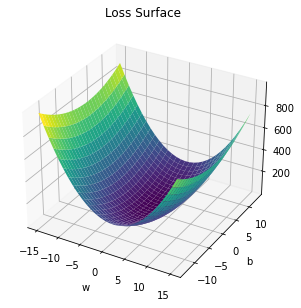

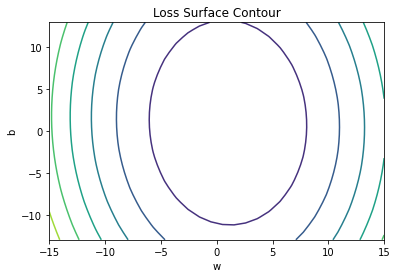

In [8]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

# Train the Model: Batch Gradient Descent

In [9]:
# Define the parameters w,b - set a random value
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [10]:
# Set the learning rate
lr = 0.1
LOSS_BGD = []

In [11]:
# Function for training the model
def train_model(iter):
    
    for epoch in range(iter):
        # Make a prediction
        Yhat = forward(X)

        # Calculate the loss
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()

        # Store the loss to list
        LOSS_BGD.append(loss)

        # Backward pass, calculate gradient for each parameter
        loss.backward()

        # Update parameters slope and bias
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data

        # zero the grad
        w.grad.data.zero_()
        b.grad.data.zero_()

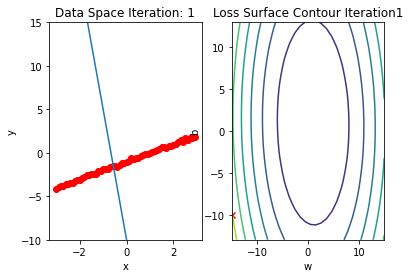

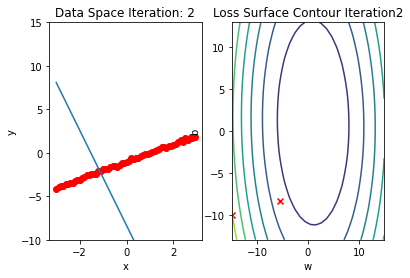

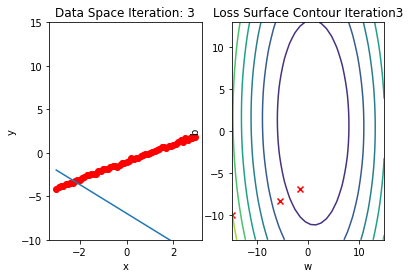

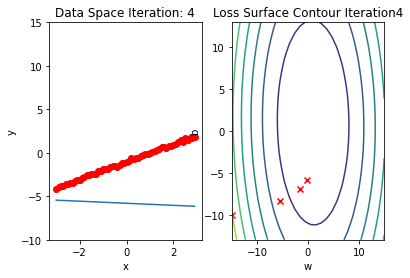

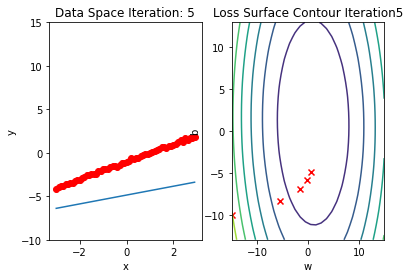

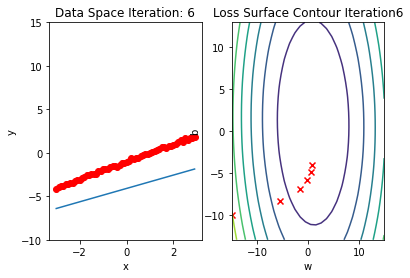

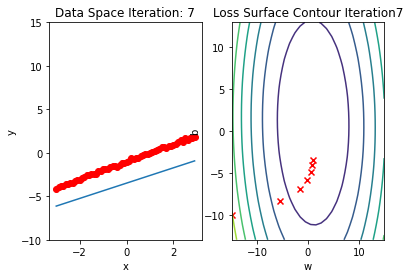

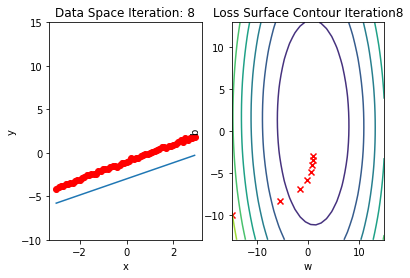

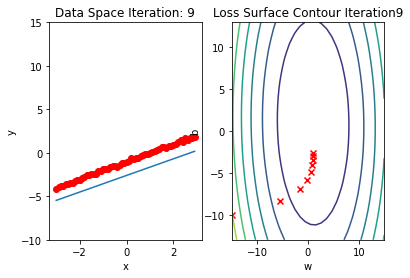

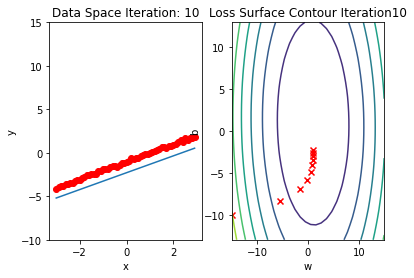

In [12]:
# Train for 10 iterations
train_model(10)

# Train the Model: Stochastic Gradient Descent

In [13]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [14]:
# Define the function for training
LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

def train_model_SGD(iter):
    
    for epoch in range(iter):
        # Calculate the true loss (SGD only approximate loss)
        Yhat = forward(X)

        # Store the loss
        LOSS_SGD.append(criterion(Yhat, Y).tolist())

        # iteration
        for x, y in zip(X, Y):
            
            # make a prediction
            yhat = forward(x)

            # calculate the loss
            loss = criterion(yhat, y)

            # section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            # backward, calculate gradient for each parameter
            loss.backward()

            # update parameter slope
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data

            # zero the gradient
            w.grad.data.zero_()
            b.grad.data.zero_()

        # Plot surface 
        get_surface.plot_ps()


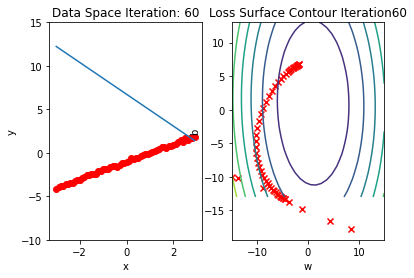

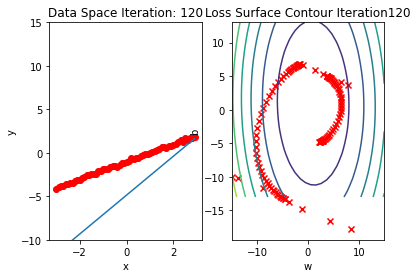

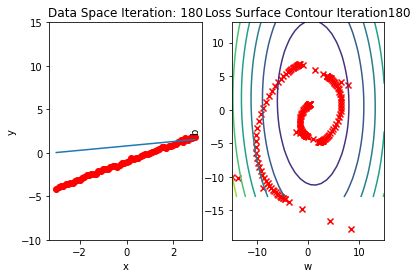

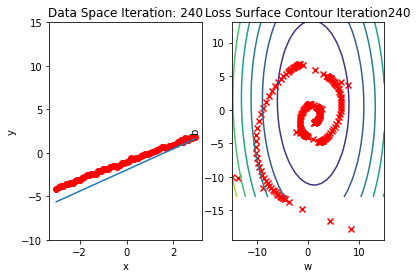

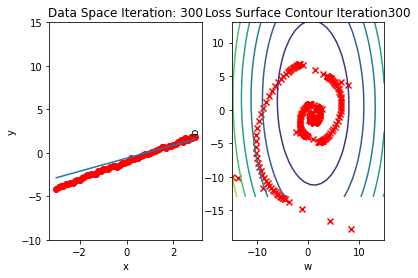

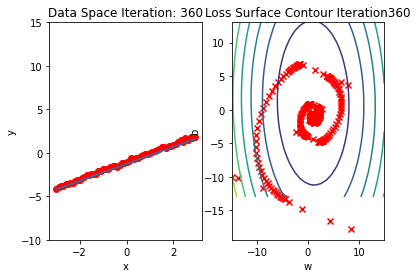

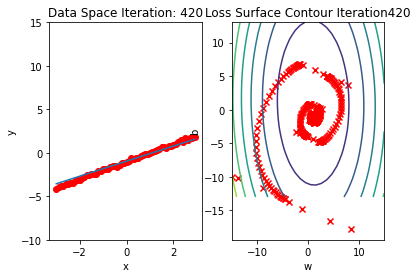

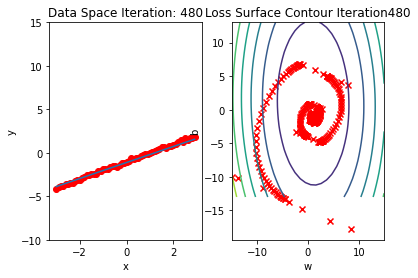

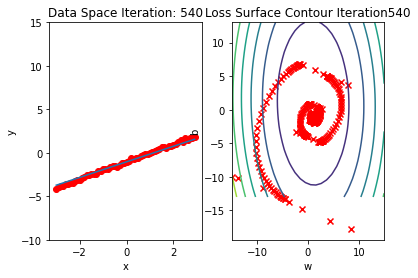

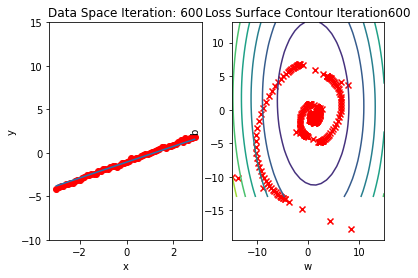

In [15]:
# Train for 10 iterations
train_model_SGD(10)

In [19]:
LOSS_SGD[0]

835.276123046875

In [20]:
loss_BGD = [ls.detach().numpy() for ls in LOSS_BGD]

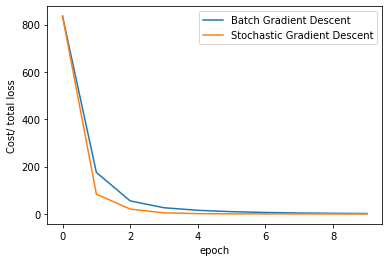

In [21]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(loss_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# SGD with Dataset DataLoader

In [22]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader

In [23]:
# Create a dataset class
class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

In [24]:
# Create the dataset and check the length

dataset = Data()
print('length of data = ', len(dataset))

length of data =  60


In [25]:
# Print the 1st point

x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


In [26]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [27]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [28]:
# Create the data loader
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [29]:
# Define the function for training
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):

    for epoch in range(epochs):
        # True loss
        Yhat = forward(X)

        # Store the loss
        LOSS_Loader.append(criterion(Yhat, Y).tolist())

        for x, y in trainloader:

            # Make a prediction
            yhat = forward(x)

            # calculate the loss
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            # backward pass, calculate gradient for each parameter
            loss.backward()

            # update parameter
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data

            # zero the grad
            w.grad.data.zero_()
            b.grad.data.zero_()

        # plot the surface
        get_surface.plot_ps()

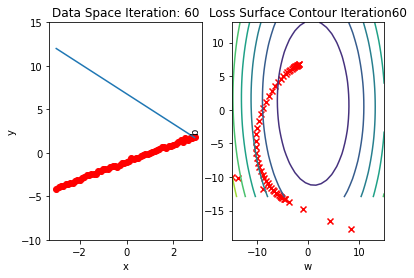

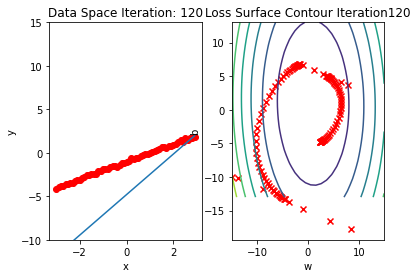

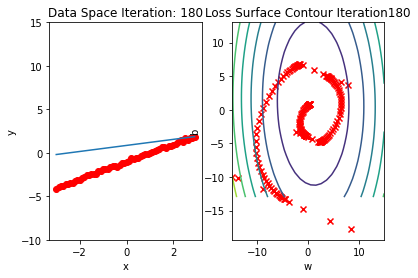

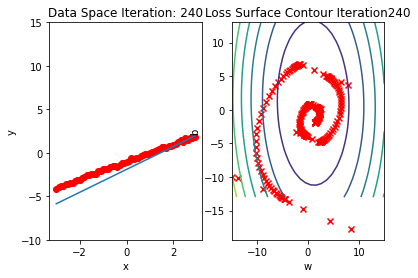

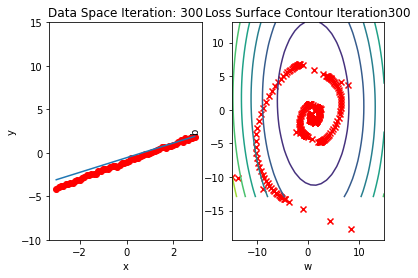

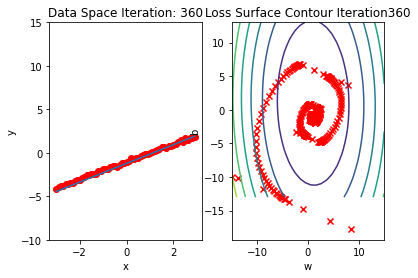

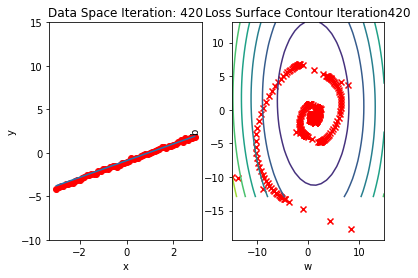

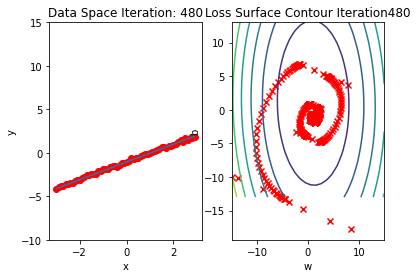

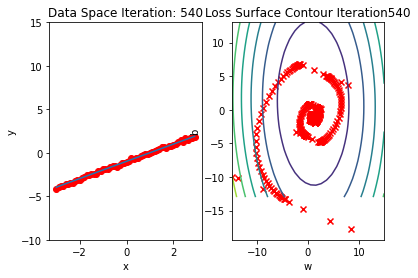

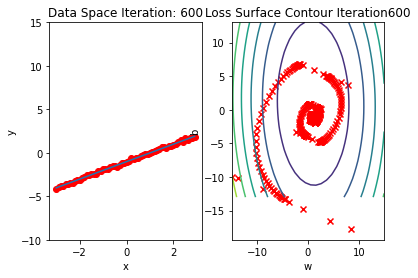

In [30]:
# train for 10 iterations
train_model_DataLoader(10)

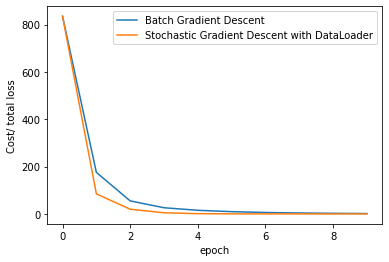

In [32]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(loss_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [33]:
# Practice
LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

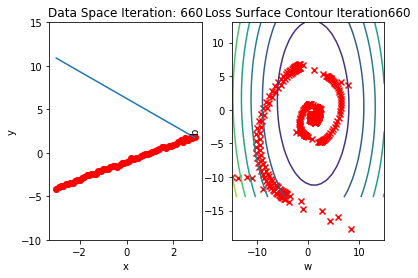

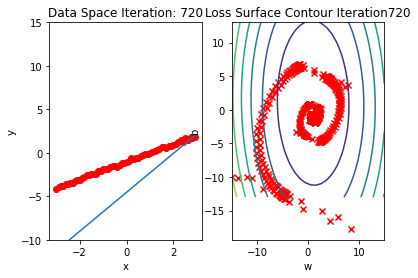

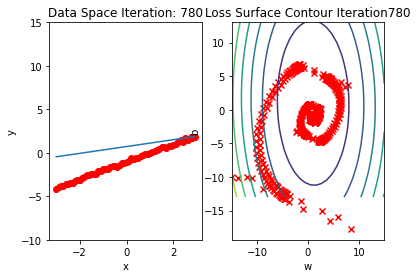

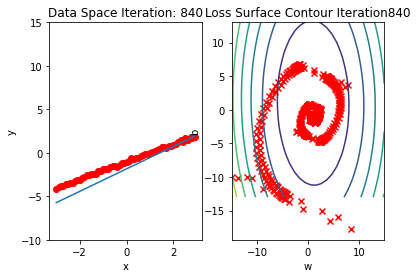

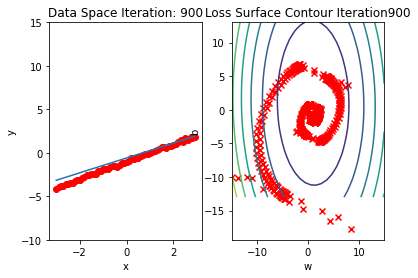

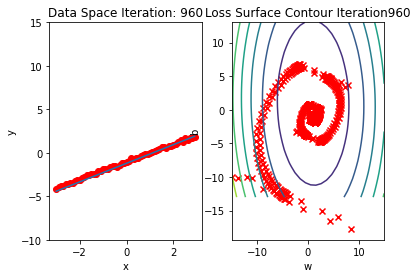

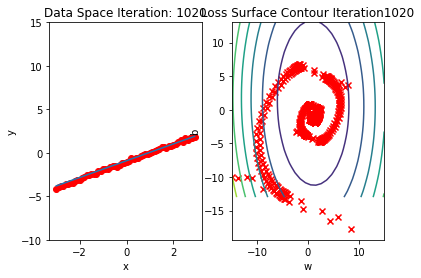

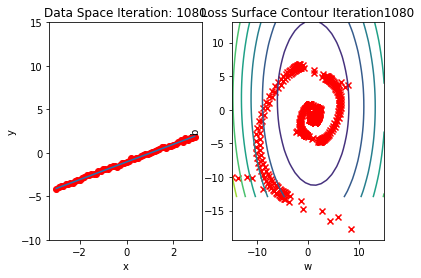

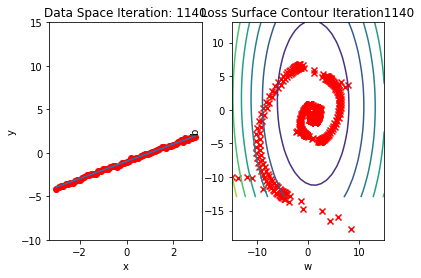

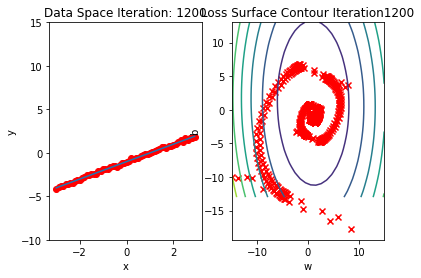

In [34]:
train_model_DataLoader(10)

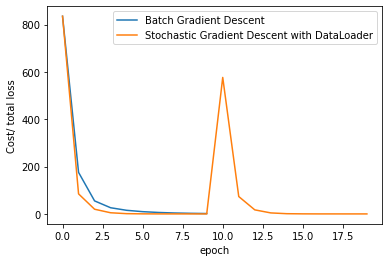

In [35]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(loss_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()